## Exploratory Data Analysis

* Cleaning the dataset (Removing outliers, spoting anomalies, handling null values, removing redundant variables, correcting data types etc.)
* Discovering patterns
* Understanding the relationship between variables using heatmap and correlation coefficient.

In [1]:
# Loading the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Loading the dataset

df = pd.read_csv('marketing_data.csv')

In [3]:
# Displaying all the columns

pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Columns:

* Id: Id card
* Year_Birth: the year of the birth
* Education: Eduation
* Maritial_status: Maritial_status
* income; salary of the year
* kidhome: Number of Children in costumers household
* teenhome: number of teenagers in costumers household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweet in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years
* NumDealsPurchases: Number of deal Purchase
* NumWebPurchases: number of people who by with web
* NumCatalogPurchases: Number of catalog purchases
* NumStorePurchases: Number of store purchases
* NumWebVisitsMonth: Number of people who visit the web in this month
* AcceptedCmp3: AcceptedCmp3
* AcceptedCmp4: AcceptedCmp4
* AcceptedCmp5: AcceptedCmp5
* AcceptedCmp1: AcceptedCmp1
* AcceptedCmp2: AcceptedCmp2
* Response: Response
* Complain: Complain
* Country: Country

In [4]:
df.shape

(2240, 28)

The dataset has 28 columns and 2240 rows.

In [5]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
# Removing white spaces
df.columns = df.columns.str.replace(' ', '')

In [8]:
df['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [9]:
# Deleting '$' and ','
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [10]:
# Converting string to float
df['Income'] = df['Income'].astype('float')

In [11]:
# Deleting ID column
del df['ID']

In [12]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

There are 24 missing values for Income feature. We can fill them with the median since there are outliers.

In [13]:
# Filling missing values with the median of income
df['Income'] = df['Income'].fillna(df['Income'].median())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

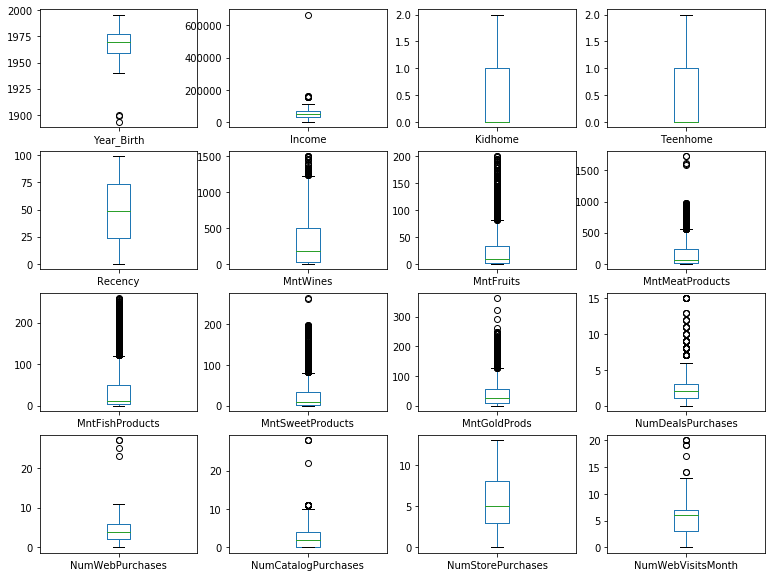

In [15]:
df_num = df[['Year_Birth','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df_num.plot(subplots = True, layout = (4,4), kind= 'box', figsize = (13, 10))

Observations:

* Year_Birth: There are some datapoints which are likely to be false since it is not likely that customers are more than 100 years old. It will be replaced with the median of age.
* Income: The Income feature has outliers but they are probably not errors. Instead they are most likely rich customers whose income are more than 100,000 dollars.
* Amount spent on gold, sweet, fish, meat, fruits and wines have many upper outliers.

In [16]:
# Converting Year_Birth to Age
import datetime
now = datetime.datetime.now()
df['Age'] = now.year - df['Year_Birth']

In [17]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63
3,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54
4,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32


In [18]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

The feature 'Marital_Status' has categories like alone, YOLO and Absurd which are not valid marital statuses. They will be removed.

In [19]:
# Removing rows with categories 'Alone', 'YOLO', 'Absurd'
df = df.drop(df[(df.Marital_Status == 'Alone') | (df.Marital_Status == 'YOLO') | (df.Marital_Status == 'Absurd')].index)

In [20]:
# Checking the correlations of the all variables with 'Age'
df_corr = df.corr(method='kendall').unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr[df_corr['level_0'] == 'Age']

,level_0,level_1,0
0,Age,Age,1.000000
126,Age,Teenhome,0.316360
194,Age,MntWines,0.160962
205,Age,Income,0.151792
215,Age,NumCatalogPurchases,0.131854
223,Age,NumStorePurchases,0.119278
227,Age,NumWebPurchases,0.116772
254,Age,MntMeatProducts,0.078548
264,Age,NumDealsPurchases,0.065289
271,Age,AcceptedCmp4,0.054973


* No strong correlation with other variables

In [21]:
df['Age'].median()

51.0

In [22]:
# Replacing the age values that are greater than 100 with the median of age
df['Age'][df['Age']>100] = df['Age'].median()

C:\Users\Melis\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.00000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,1968.790864,52234.708016,0.444245,0.506046,49.172414,304.033587,26.300940,167.113300,37.445141,27.108374,43.903269,2.321093,4.081505,2.661890,5.79176,5.316167,0.072548,0.074787,0.072548,0.064039,0.013435,0.148231,0.009404,52.111509
std,11.979248,25062.791884,0.538528,0.544675,28.962114,336.953019,39.779532,225.870588,54.461569,41.321700,52.009602,1.932181,2.776886,2.921749,3.25473,2.425668,0.259451,0.263107,0.259451,0.244878,0.115153,0.355408,0.096541,11.688406
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,1959.000000,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,1970.000000,51381.500000,0.000000,0.000000,50.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.00000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000


In [24]:
# Number of minors in the household.
df['Minors'] = df['Kidhome'] + df['Teenhome']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2233 non-null   int64  
 1   Education            2233 non-null   object 
 2   Marital_Status       2233 non-null   object 
 3   Income               2233 non-null   float64
 4   Kidhome              2233 non-null   int64  
 5   Teenhome             2233 non-null   int64  
 6   Dt_Customer          2233 non-null   object 
 7   Recency              2233 non-null   int64  
 8   MntWines             2233 non-null   int64  
 9   MntFruits            2233 non-null   int64  
 10  MntMeatProducts      2233 non-null   int64  
 11  MntFishProducts      2233 non-null   int64  
 12  MntSweetProducts     2233 non-null   int64  
 13  MntGoldProds         2233 non-null   int64  
 14  NumDealsPurchases    2233 non-null   int64  
 15  NumWebPurchases      2233 non-null   i

In [26]:
# Converting date of customer's enrollment with the company to year
df['Customer_since'] = pd.DatetimeIndex(df['Dt_Customer']).year

In [27]:
# Droping both Dt_Customer and Year_Birth since we already have Customer_since and Age instead
df = df.drop(['Dt_Customer', 'Year_Birth'], axis = 1)

In [28]:
# Total amount spent
df['TotalMnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [29]:
# Amount spent on luxury items
df['LuxMnt'] = df['MntWines'] + df['MntGoldProds']

In [30]:
# Number of total purchases
df['NumPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [31]:
# Number of remote purchases
df['RemPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases']

In [32]:
# MarketingResponsiveness
df['Responsiveness'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [33]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Minors,Customer_since,TotalMnt,LuxMnt,NumPurchases,RemPurchases,Responsiveness
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,2014,1190,407,16,8,0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,2014,577,501,23,10,1
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,2014,251,164,13,5,0
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,2014,11,10,11,1,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,2014,91,40,15,4,1


In [34]:
# Choosing the numerical columns that can be useful
df_corr = df.drop(columns = ['Kidhome', 'Teenhome']).select_dtypes(include = np.number)

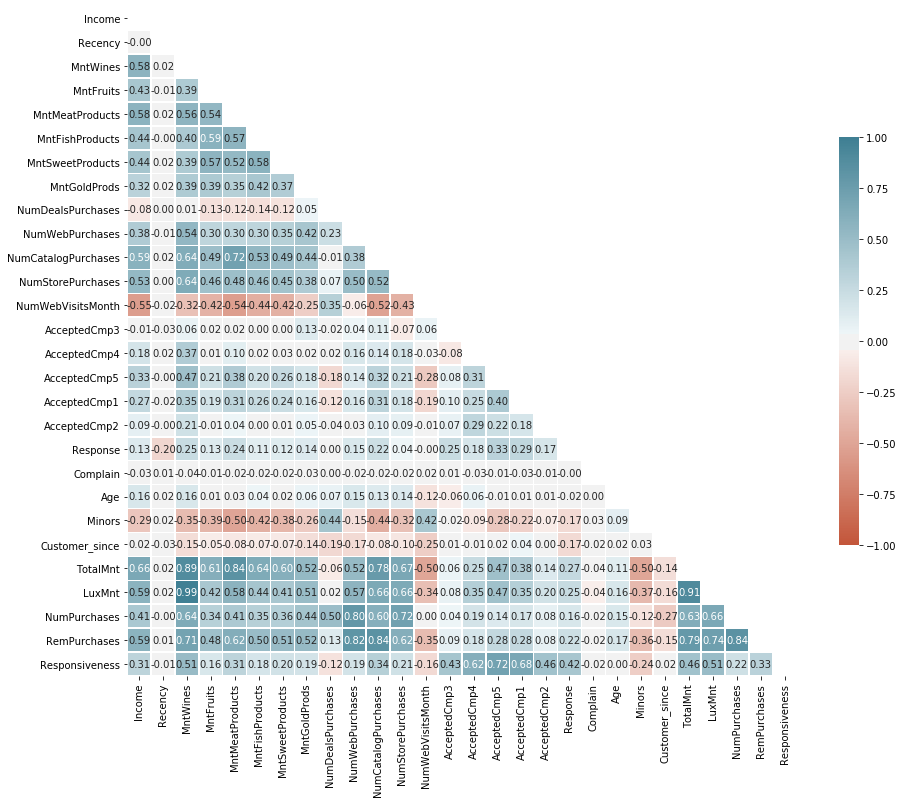

In [35]:
# Compute the correlation matrix
corr = df_corr.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin =-1,
            vmax=1, annot=True, fmt='.2f' ,center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
# Effects of Income
df_corr = df.corr().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()

In [37]:
df_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0:'Correlation Coefficient' }, inplace= True)

In [38]:
df_corr[df_corr['Feature 1'] == 'Income']

,Feature 1,Feature 2,Correlation Coefficient
29,Income,Income,1.000000
71,Income,TotalMnt,0.664398
100,Income,NumCatalogPurchases,0.586507
102,Income,LuxMnt,0.585553
105,Income,RemPurchases,0.585250
108,Income,MntMeatProducts,0.577991
112,Income,MntWines,0.576693
129,Income,NumStorePurchases,0.526401
185,Income,MntFishProducts,0.437338
186,Income,MntSweetProducts,0.436116


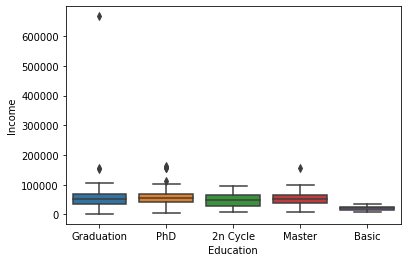

In [39]:
sns.boxplot(x = 'Education', y = 'Income', data = df)

Income is strongly correlated with:
* total amount spent
* number of purchases
* total amount spent on luxury items
* amount spent for wines
* amount spent for meat
* number of catalog purchases
* number of store purchases
* higher education
Income is negatively correlated with:
* number of website visits
* number of minors in the household

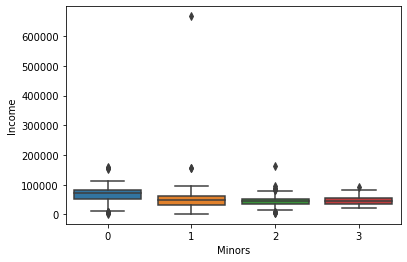

In [40]:
sns.boxplot(x = 'Minors', y = 'Income', data = df)

### Effects of Minors 

In [41]:
df_corr = df.corr().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': ' Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_corr[df_corr['Feature 1'] == 'Minors']

,Feature 1,Feature 2,Correlation Coefficient
5,Minors,Minors,1.000000
61,Minors,Teenhome,0.698252
63,Minors,Kidhome,0.689777
180,Minors,NumDealsPurchases,0.440027
204,Minors,NumWebVisitsMonth,0.417444
438,Minors,Age,0.094957
496,Minors,Customer_since,0.031496
498,Minors,Complain,0.031136
533,Minors,Recency,0.018810
674,Minors,AcceptedCmp3,-0.022848


The presence of minors in the household is positively correlated with:
* number of deals purchased
* number of monthly website visits
The presence of minors in the household is negatively correlated with:
* total amount spent
* amount spent on fish
* amount spent on meat
* amount spent on sweets
* amount spent on fruits
* amount spent on luxury items
* number of catalog purchases
* number of remote purchases
* number of store purchases
* Income

People with more children tend to have less income. Even though they visit website more often, remore purchases they do is less.

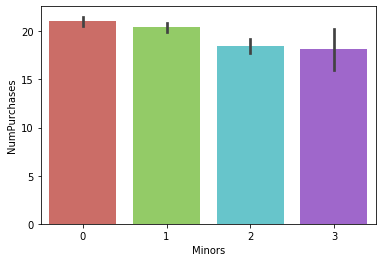

In [42]:
sns.barplot(x = 'Minors', y = 'NumPurchases', data = df, palette = 'hls')

The presence of less number of minors in the household is positively correlated with number of purchases.

### Customer Loyalty, Recency, Satisfaction and Campaign Responsiveness

In [43]:
df_corr = df.corr().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_corr.rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_corr[df_corr['Feature 1'] == 'Responsiveness']

,Feature 1,Feature 2,Correlation Coefficient
0,Responsiveness,Responsiveness,1.000000
56,Responsiveness,AcceptedCmp5,0.715066
65,Responsiveness,AcceptedCmp1,0.678441
88,Responsiveness,AcceptedCmp4,0.616028
141,Responsiveness,MntWines,0.513359
145,Responsiveness,LuxMnt,0.507610
172,Responsiveness,TotalMnt,0.459985
174,Responsiveness,AcceptedCmp2,0.459415
193,Responsiveness,AcceptedCmp3,0.429883
199,Responsiveness,Response,0.424876


Observations:

Responsivenss is positively correlated with:

* amount spent on wine
* amount spent on luxury items
* total amount spent
* number of catalog purchases
* number of remote purchases
* amount spent on meat
* income

Responsiveness is negatively correlated with:

* number of minors in the household
* number of website visits

Marketing activities had a stronger effect on purchases of luxury goods and remote purchases.

In [44]:
df_corr = df.corr().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_corr[df_corr['Feature 1'] == 'Recency']

,Feature 1,Feature 2,Correlation Coefficient
25,Recency,Recency,1.000000
510,Recency,NumCatalogPurchases,0.023366
519,Recency,MntMeatProducts,0.021870
520,Recency,MntSweetProducts,0.021407
530,Recency,TotalMnt,0.019267
532,Recency,Minors,0.018810
534,Recency,Age,0.018606
536,Recency,AcceptedCmp4,0.018239
541,Recency,Teenhome,0.017387
544,Recency,LuxMnt,0.016794


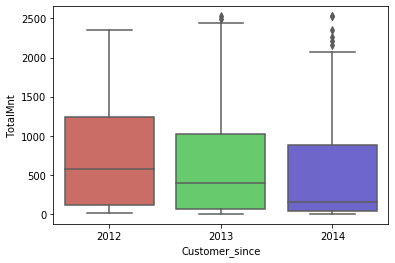

In [45]:
sns.boxplot(x = 'Customer_since', y = 'TotalMnt', data = df, palette = 'hls')

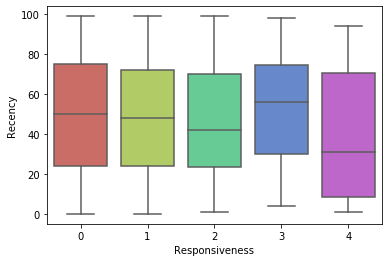

In [46]:
sns.boxplot(x = 'Responsiveness', y = 'Recency', data = df, palette = 'hls')

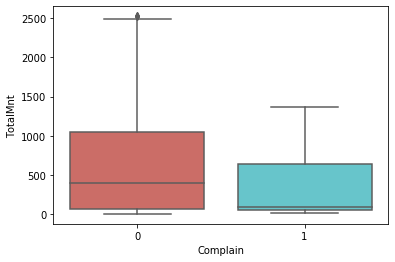

In [47]:
sns.boxplot(x = 'Complain', y = 'TotalMnt', data = df, palette = 'hls')

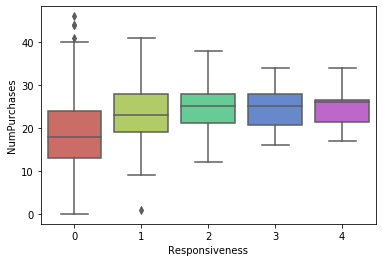

In [48]:
sns.boxplot(x = 'Responsiveness', y = 'NumPurchases', data = df, palette = 'hls')

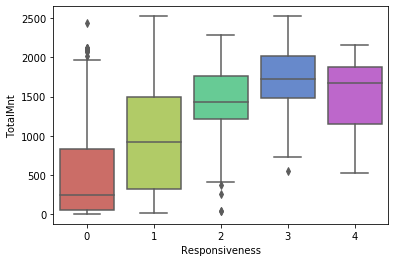

In [49]:
sns.boxplot(x = 'Responsiveness', y = 'TotalMnt', data = df, palette = 'hls')

Observations:

* Total amount spent is negatively correlated with date of enrollment with the customer
* Customers who have complained spent less
* No strong correlations for feature Recency

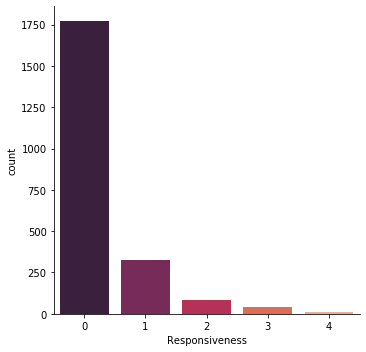

In [50]:
sns.catplot(x='Responsiveness', kind='count', palette = "rocket", data=df)

The majority of the customers did not respond to any of the marketing campaigns.

In [51]:
df_corr = df.corr().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_corr[df_corr['Feature 1'] == 'NumWebVisitsMonth']

,Feature 1,Feature 2,Correlation Coefficient
1,NumWebVisitsMonth,NumWebVisitsMonth,1.000000
179,NumWebVisitsMonth,Kidhome,0.448396
205,NumWebVisitsMonth,Minors,0.417444
257,NumWebVisitsMonth,NumDealsPurchases,0.346363
414,NumWebVisitsMonth,Teenhome,0.132839
465,NumWebVisitsMonth,AcceptedCmp3,0.061779
524,NumWebVisitsMonth,Complain,0.019822
586,NumWebVisitsMonth,NumPurchases,0.002539
616,NumWebVisitsMonth,Response,-0.002937
628,NumWebVisitsMonth,AcceptedCmp2,-0.007194


Monthly website visits are positively correlated with:

* presence of minors
* number of deals purchased

Monthly website visits are negatively correlated with:

* income
* amount spent on meat
* number of catalog purchases
* total amount spent
* total amount spent on fish
* number of store purchases
* total amount spent on sweets
* amount spent on fruits
* amount spent on luxury products
* amount spent on wine

## Statistical Analysis

Run statistical analysis to answer following questions that your chief marketing officer is asking you.

1. What factors are significantly related to the number of store purchases?
2. Does US fare significantly better than the Rest of the World in terms of total purchases?
3. Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
4. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
5. Is there a significant relationship between geographical regional and success of a campaign?

### 1. What factors are significantly related to the number of store purchases?

We will build a multiple linear regression model and using the coefficients we will be able to determine the most significant factors (both positively and negatively correlated).

In [52]:
df_reg = df.drop(['Customer_since'], axis = 1)

In [53]:
df_reg

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Minors,TotalMnt,LuxMnt,NumPurchases,RemPurchases,Responsiveness
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,1190,407,16,8,0
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,577,501,23,10,1
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,251,164,13,5,0
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,11,10,11,1,0
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,91,40,15,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,45,1,689,450,24,7,0
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,44,1,55,21,13,1,0
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,45,1,309,199,22,7,0
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,43,0,1383,330,23,9,0


In [58]:
X = df.drop('NumStorePurchases', axis = 1)
y = df['NumStorePurchases']

In [63]:
X = pd.get_dummies(data = X, drop_first = True)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1786, 47)
(447, 47)
(1786,)
(447,)


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
print(model.intercept_)

-2.297717571764224e-12


In [76]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Income,4.986291e-18
Kidhome,-9.310915e-14
Teenhome,-1.020049e-13
Recency,-4.639123e-17
MntWines,-3.248244e-13
MntFruits,-8.743763e-14
MntMeatProducts,-8.775365e-14
MntFishProducts,-8.747590e-14
MntSweetProducts,-8.777396e-14
MntGoldProds,-3.247879e-13


Findings:

The number of store purchases increases with the higher number of total amount purchased(TotalMnt), higher income and marital status being Married and country being Germany.

The number of store purchases decreases with the higher number of catalog, web or deals purchases. 

Interpretation: 
* Customers who shop in stores are those who don't often shop online. 
* Customers with high income and from Germany tend to shop in stores.

### 2. Does US fare significantly better than the rest of the world in terms of total purchases?

We will make a bar chart showing the total number of purchases by country to decide whether US fare better than the rest of the world.

In [87]:
df['total_purchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

Text(0, 0.5, 'Number of Purchases')

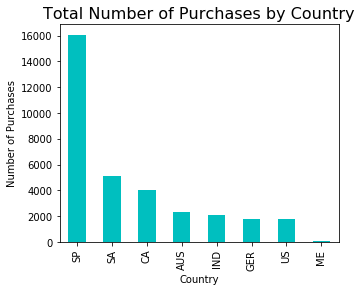

In [95]:
plt.figure(figsize=(5,4))
df.groupby('Country')['total_purchase'].sum().sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases')

Findings:

Spain (SP) has the highest number of purchases. US is second to last thus we can conclude that US does not fare better than the rest of the world in terms of total purchases.

Let's analyze if US fares better on average number of purchases.

Text(0, 0.5, 'Number of Purchases')

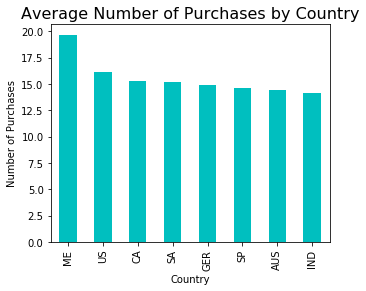

In [104]:
plt.figure(figsize=(5,4))
df.groupby('Country')['total_purchase'].mean().sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.title('Average Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases')

Findings:
 
Us does not fare better than other countries considering the average purchase. It is behind Mexico and also it is very close to the other countries. Therefore, we can conclude that US does not fare better than other countries.

### 3. Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refuse this statement using an appropriate statistical test.

We will create a scatter plot with a regression line to see if there is really a positive relationship between amount spent on gold and number of store purchases. 

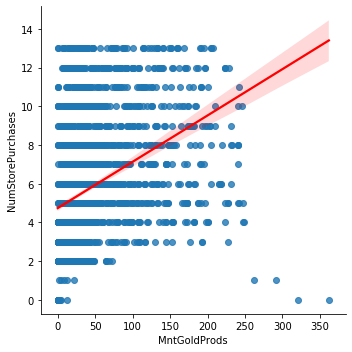

In [108]:
sns.lmplot(x = 'MntGoldProds', y = 'NumStorePurchases', data = df, line_kws={'color': 'red'})

Findings:

It seems from the regression line like there is a positive relationship between them. But is it statistically significant?

Ho: Store purchases of people who spend more on gold <= Store purchases of people who spend less on gold

Ha: Store purchases of people who spend more on gold > Store purchases of people who spend less on gold

In [109]:
from scipy.stats import kendalltau
kendall_corr = kendalltau(x = df['MntGoldProds'], y = df['NumStorePurchases'])

print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value:', kendall_corr.pvalue)

Kendall correlation (tau):  0.39240073572591627
Kendall p-value: 1.2001570378333117e-151


Findings:

Since p-value is very small, we can reject the null hypothesis. 

Also, we can justify the supervisor's claim that people who buy golds are tend to purchase from store.

### 4. Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?